## US Accidents

### Dataset Info
This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2020. Currently there are about 4.2 millions accident records in this dataset.

Source - Kaggle

In [1]:
# getting dataset
!pip install kaggle
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"sachinkumar20","key":"d62f0e4ff97b2bb0c32edf74105574f8"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d sobhanmoosavi/us-accidents

 94% 282M/299M [00:02<00:00, 140MB/s]
100% 299M/299M [00:02<00:00, 120MB/s]


In [3]:
!unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_Dec20.csv  


### Importing and Cleaning Data

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
us_acc = pd.read_csv('/content/US_Accidents_Dec20.csv')
us_acc.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


#### Knowing data

In [6]:
# Columns
us_acc.columns


Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [7]:
# Size of data
len(us_acc)

4232541

In [8]:
# Data types of columns
us_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4232541 entries, 0 to 4232540
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

In [9]:
# getting info about numerical columns
us_acc.describe()


,TMC,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.716477e+06,4.232541e+06,4.232541e+06,4.232541e+06,1.516064e+06,1.516064e+06,4.232541e+06,1.544592e+06,4.142641e+06,2.336540e+06,4.137074e+06,4.156157e+06,4.133873e+06,3.753215e+06,2.166952e+06
mean,2.083517e+02,2.305035e+00,3.639782e+01,-9.546420e+01,3.690061e+01,-9.859901e+01,3.357021e-01,6.141507e+03,6.147799e+01,5.489319e+01,6.567422e+01,2.969371e+01,9.111991e+00,7.903433e+00,1.244719e-02
std,2.124413e+01,5.332261e-01,4.964404e+00,1.735319e+01,5.165629e+00,1.849590e+01,1.602143e+00,1.492268e+04,1.852586e+01,2.272355e+01,2.272342e+01,8.639260e-01,2.817582e+00,5.330998e+00,1.637154e-01
min,2.000000e+02,1.000000e+00,2.455527e+01,-1.246238e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.352058e+01,-1.173570e+02,3.385420e+01,-1.182077e+02,0.000000e+00,8.980000e+02,4.900000e+01,3.800000e+01,4.900000e+01,2.964000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.582542e+01,-9.002078e+01,3.735134e+01,-9.437987e+01,0.000000e+00,2.890000e+03,6.300000e+01,5.800000e+01,6.800000e+01,2.993000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.018313e+01,-8.084682e+01,4.072593e+01,-8.087449e+01,8.900000e-02,7.330000e+03,7.520000e+01,7.300000e+01,8.500000e+01,3.008000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,9.999997e+06,2.030000e+02,1.890000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.500000e+01


#### Cleaning data

In [10]:
# getting count of null values in columns
null_counts = us_acc.isna().sum().sort_values(ascending=False)
null_counts[null_counts > 0]

End_Lat                  2716477
End_Lng                  2716477
Number                   2687949
Precipitation(in)        2065589
Wind_Chill(F)            1896001
TMC                      1516064
Wind_Speed(mph)           479326
Visibility(mi)             98668
Weather_Condition          98383
Humidity(%)                95467
Temperature(F)             89900
Wind_Direction             83611
Pressure(in)               76384
Weather_Timestamp          62644
Airport_Code                8973
Timezone                    4615
Zipcode                     1292
Nautical_Twilight            141
Astronomical_Twilight        141
Civil_Twilight               141
Sunrise_Sunset               141
City                         137
Description                    2
dtype: int64

### Data Analysis and Visualization

Columns we will be using for analysis
1. State 
2. City
3. Start time
4. Weather condition
5. Temperature
6. Severity 
7. Other Factors such as Bump, Crossing, No_Exit, Roundabout etc. 
  


#### State

In [11]:
# State
accidents_by_state = us_acc['State'].value_counts()
accidents_by_state.head()

CA    972585
TX    376445
FL    370131
SC    212712
NC    193457
Name: State, dtype: int64

In [12]:
# adding ranks to state
def get_rank(state):
  value = accidents_by_state[state]
  accidents_by_state_rank = pd.Index(accidents_by_state)
  rank = accidents_by_state_rank.get_loc(value)
  print(rank)

In [13]:
get_rank('NY')

5


In [14]:
accidents_by_state[:10]

CA    972585
TX    376445
FL    370131
SC    212712
NC    193457
NY    189513
PA    136049
VA    127949
IL    111712
OR    108352
Name: State, dtype: int64

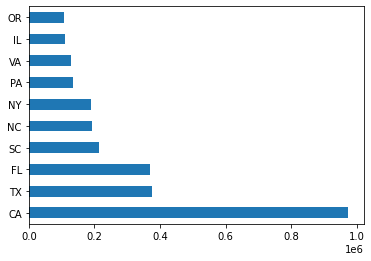

In [15]:
accidents_by_state[:10].plot(kind='barh')

#### City

In [16]:
# City
accidents_by_city = us_acc['City'].value_counts()
accidents_by_city[:20]

Houston          114905
Los Angeles       92701
Charlotte         88887
Dallas            77303
Austin            70538
Miami             63162
Raleigh           52876
Atlanta           46328
Baton Rouge       42814
Nashville         41850
Orlando           39561
Oklahoma City     39484
Sacramento        38061
Phoenix           32805
Minneapolis       31781
San Diego         29416
Seattle           28004
Richmond          27907
San Antonio       27516
Jacksonville      24009
Name: City, dtype: int64

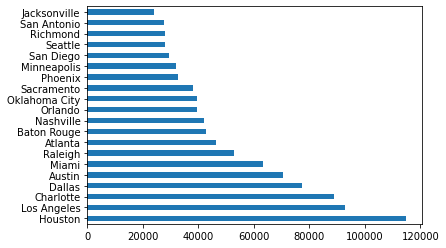

In [17]:
# getting a graph
accidents_by_city[:20].plot(kind='barh')

#### NY Details

In [18]:
# Check if NY in States:
'NY' in list(us_acc['State'])

True

In [19]:
us_acc['State'].unique()

array(['OH', 'WV', 'CA', 'FL', 'GA', 'SC', 'NE', 'IA', 'IL', 'MO', 'WI',
       'IN', 'MI', 'NJ', 'NY', 'CT', 'MA', 'RI', 'NH', 'PA', 'KY', 'MD',
       'VA', 'DC', 'DE', 'TX', 'WA', 'OR', 'AL', 'ME', 'VT', 'TN', 'NC',
       'KS', 'MN', 'LA', 'OK', 'AR', 'UT', 'CO', 'AZ', 'NM', 'NV', 'MS',
       'ID', 'WY', 'MT', 'ND', 'SD'], dtype=object)

In [20]:
# Check if New York in cities
'New York' in list(us_acc['City'])

True

In [21]:
# Check where New York ranks in cities
x = list(accidents_by_city)
# Check again

#### Weather

In [22]:
# Weather
weather_values = us_acc['Weather_Condition'].value_counts()
weather_values[:10]

Fair                900872
Clear               808181
Mostly Cloudy       571743
Partly Cloudy       397415
Overcast            382485
Cloudy              323340
Light Rain          206389
Scattered Clouds    204661
Light Snow           57148
Rain                 48641
Name: Weather_Condition, dtype: int64

#### Temperature(F)

In [23]:
# Temperature
temperature_values = us_acc['Temperature(F)'].value_counts()

In [24]:
temperature_values[:10]

68.0    91545
77.0    90041
59.0    86347
73.0    84212
63.0    80072
        ...  
96.1     3041
17.1     2993
12.0     2883
20.0     2625
10.0     2558
Name: Temperature(F), Length: 153, dtype: int64

In [25]:
# getting numerical extracts from temperature
us_acc['Temperature(F)'].describe() 

count    4.142641e+06
mean     6.147799e+01
std      1.852586e+01
min     -8.900000e+01
25%      4.900000e+01
50%      6.300000e+01
75%      7.520000e+01
max      2.030000e+02
Name: Temperature(F), dtype: float64

75 % accidents showing below 75 F temperature 

In [26]:
max_temp = us_acc['Temperature(F)'].max()
us_acc[us_acc['Temperature(F)'] == max_temp]

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
694282,A-694311,MapQuest,201.0,3,2020-07-17 11:41:59,2020-07-17 12:26:37,32.670929,-97.062508,NaN,NaN,0.0,Main roadway closed due to accident on TX-360 ...,NaN,TX-360 N,R,Arlington,Tarrant,TX,76018,US,US/Central,KGKY,2020-07-17 11:53:00,203.0,NaN,35.0,29.4,10.0,NaN,NaN,0.0,Fair,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day


In [27]:
min_temp = us_acc['Temperature(F)'].min()
us_acc[us_acc['Temperature(F)'] == min_temp]

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
849453,A-849533,MapQuest,343.0,3,2020-04-03 07:37:17,2020-04-03 08:10:00,39.779041,-104.990044,NaN,NaN,0.43,Earlier accident on exit ramp from I-70 Eastbo...,NaN,I-25 S,R,Denver,Denver,CO,80216,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
849455,A-849535,MapQuest,343.0,3,2020-04-03 07:44:19,2020-04-03 08:34:00,39.778301,-104.899284,NaN,NaN,0.00,Slow traffic due to earlier accident on I-70 E...,NaN,I-70 E,R,Denver,Denver,CO,80216,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
849457,A-849537,MapQuest-Bing,201.0,2,2020-04-03 07:50:12,2020-04-03 09:36:00,39.741428,-104.998894,NaN,NaN,0.00,Accident on Stout St at Speer Blvd. No recent ...,1543.0,Speer Blvd,R,Denver,Denver,CO,80204,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,True,False,False,False,True,False,False,False,False,True,False,Day,Day,Day,Day
849459,A-849539,MapQuest,201.0,2,2020-04-03 07:58:54,2020-04-03 09:00:00,39.725639,-105.081718,NaN,NaN,0.00,Accident on CO-121 Wadsworth Blvd Northbound a...,NaN,US-6 W,R,Denver,Jefferson,CO,80214,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
849460,A-849540,MapQuest,201.0,2,2020-04-03 07:59:49,2020-04-03 09:01:00,39.785191,-105.081772,NaN,NaN,0.53,Accident on entry ramp to I-70 Eastbound from ...,NaN,Wadsworth Blvd,R,Wheat Ridge,Jefferson,CO,80033,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
849462,A-849542,MapQuest,201.0,3,2020-04-03 08:05:15,2020-04-03 08:51:00,39.767784,-104.995468,NaN,NaN,0.00,Left lane blocked due to accident on I-25 Nort...,NaN,I-25 N,R,Denver,Denver,CO,80216,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day
849463,A-849543,MapQuest,201.0,2,2020-04-03 08:10:07,2020-04-03 09:11:00,39.779591,-104.988220,NaN,NaN,0.43,Exit ramp from I-25 Northbound at Exits 213 21...,NaN,I-70 E,R,Denver,Denver,CO,80216,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
849464,A-849544,MapQuest,201.0,2,2020-04-03 08:15:53,2020-04-03 09:17:00,39.733109,-105.053238,NaN,NaN,0.00,Accident on 10th Ave at CO-95 Sheridan Blvd. N...,5224.0,W 10th Ave,L,Lakewood,Jefferson,CO,80214-2524,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,True,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
3610682,A-3617506,Bing,NaN,2,2020-04-03 07:23:13,2020-04-03 08:43:11,39.729290,-105.025200,39.72929,-105.02520,0.00,At Lowell Blvd - Accident.,3001.0,W 6th Ave,L,Denver,Denver,CO,80204,US,US/Mountain,KBJC,2020-04-03 07:47:00,-89.0,-89.0,NaN,24.47,5.0,CALM,0.0,0.0,Cloudy,False,False,True,False,False,True,False,False,False,False,False,True,False,Day,Day,Day,Day
3610688,A-3617512,Bing,NaN,3,2020-04-03 07:56:58,2020-04-03 08:56:58,39.778300

#### Start Time

In [28]:
type(us_acc['Start_Time'][0])

str

In [29]:
us_acc['Start_Time'] = pd.to_datetime(us_acc['Start_Time'])

In [30]:
type(us_acc['Start_Time'][0])

pandas._libs.tslibs.timestamps.Timestamp

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


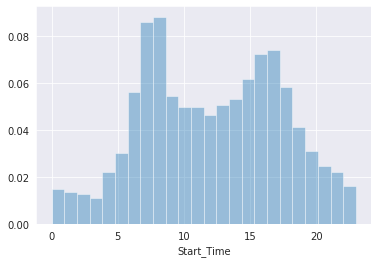

In [31]:
# get graph for accidents at what time of day
sns.set_style('darkgrid')
sns.distplot(us_acc['Start_Time'].dt.hour, bins=24, kde=False, norm_hist=True) 

Most accidents seems to be between 8AM to 10AM, then 3PM to 6PM

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


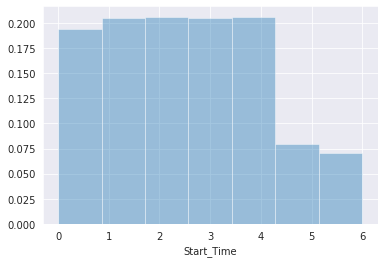

In [32]:
# get graph for accidents on week of the day
sns.distplot(us_acc['Start_Time'].dt.weekday, bins=7, kde=False, norm_hist=True)

Seems less accidents on weekend

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


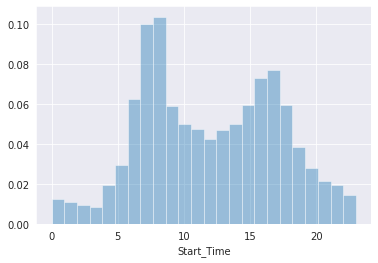

In [33]:
# Check day time of accidents on weekdays comparitively to weekend
monday_data = us_acc[us_acc['Start_Time'].dt.dayofweek == 1 ]
sns.distplot(monday_data['Start_Time'].dt.hour, bins=24, kde=False, norm_hist=True) 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


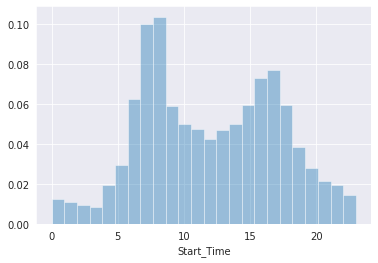

In [34]:
monday_data = us_acc[us_acc['Start_Time'].dt.dayofweek == 1 ]
sns.distplot(monday_data['Start_Time'].dt.hour, bins=24, kde=False, norm_hist=True) 

Change in time of accidents on weekdays and weekend

#### Severity

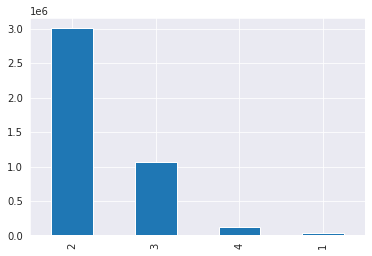

In [35]:
# How severe were accidents
severity_types = us_acc['Severity'].value_counts()
severity_types.plot(kind='bar')

#### Other Factors

In [36]:
us_acc.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [37]:
# Getting other factors that could relate to severity
other_factors = ['Severity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Roundabout', 'Stop', 'Traffic_Signal', 'Turning_Loop']
other_factors_data = us_acc[other_factors]
other_factors_data.head()

,Severity,Bump,Crossing,Give_Way,Junction,No_Exit,Roundabout,Stop,Traffic_Signal,Turning_Loop
0,3,False,False,False,False,False,False,False,False,False
1,2,False,False,False,False,False,False,False,False,False
2,2,False,False,False,False,False,False,False,True,False
3,3,False,False,False,False,False,False,False,False,False
4,2,False,False,False,False,False,False,False,True,False


In [38]:
other_factors_data.groupby('Severity').sum()

,Bump,Crossing,Give_Way,Junction,No_Exit,Roundabout,Stop,Traffic_Signal,Turning_Loop
Severity,,,,,,,,,
1,10,9155,96,2537,124,1,526,12666,0
2,723,309628,10348,212039,4664,228,65723,637321,0
3,116,22601,2309,111055,1033,3,4126,66031,0
4,12,6033,442,14011,148,5,1808,12093,0


In [39]:
# checking for turning loop values
us_acc['Turning_Loop'].value_counts()

False    4232541
Name: Turning_Loop, dtype: int64

In [40]:
# importing geopandas
!pip install geopandas
import geopandas as gpd

     |████████████████████████████████| 1.0MB 8.3MB/s 
     |████████████████████████████████| 6.5MB 22.3MB/s 
     |████████████████████████████████| 14.8MB 309kB/s 


In [42]:
us_shape = gpd.read_file('gz_2010_us_040_00_500k.shp')
us_shape.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,None,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,None,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,None,56538.901,"MULTIPOLYGON (((-88.68443 48.11578, -88.67563 ..."
3,0400000US30,30,Montana,None,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,None,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


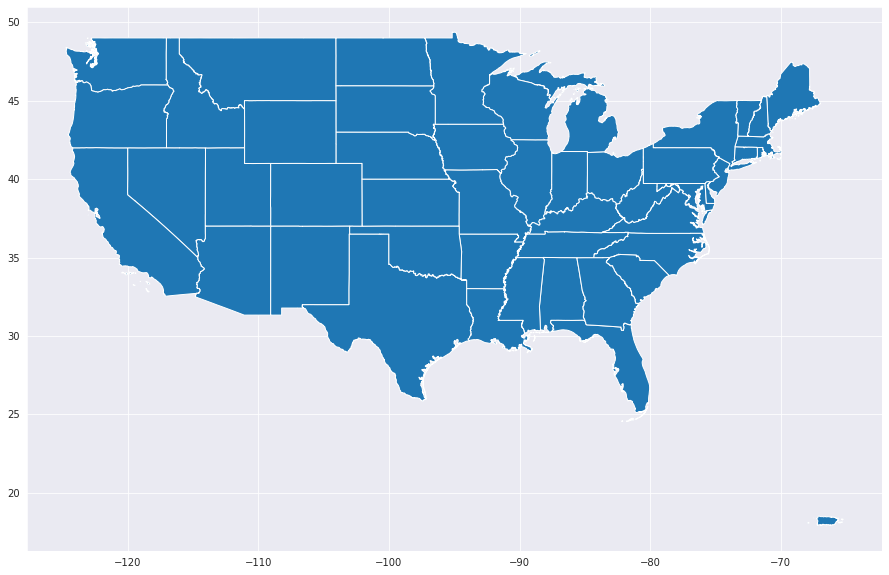

In [51]:
us_shape[us_shape['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,10))



In [52]:
us_acc.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [53]:
us_acc[['Start_Lat','Start_Lng']].head()

,Start_Lat,Start_Lng
0,39.865147,-84.058723
1,39.928059,-82.831184
2,39.063148,-84.032608
3,39.747753,-84.205582
4,39.627781,-84.188354


In [62]:
us_acc['coordinates'] = us_acc[['Start_Lng','Start_Lat']].values.tolist()
us_acc['coordinates'].head()

/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1321: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


0             [-84.058723, 39.865147]
1    [-82.831184, 39.928059000000005]
2             [-84.032608, 39.063148]
3     [-84.20558199999999, 39.747753]
4             [-84.188354, 39.627781]
Name: coordinates, dtype: object

In [63]:
from shapely.geometry import Point
us_acc['coordinates'] = us_acc['coordinates'].apply(Point)

In [64]:
us_acc = gpd.GeoDataFrame(us_acc, geometry='coordinates')
us_acc.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,coordinates
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,POINT (-84.05872 39.86515)
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,2584.0,Brice Rd,L,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,POINT (-82.83118 39.92806)
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,NaN,State Route 32,R,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,POINT (-84.03261 39.06315)
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,NaN,I-75 S,R,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,POINT (-84.20558 39.74775)
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,NaN,Miamisburg Centerville Rd,R,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,POINT (-84.18835 39.62778)


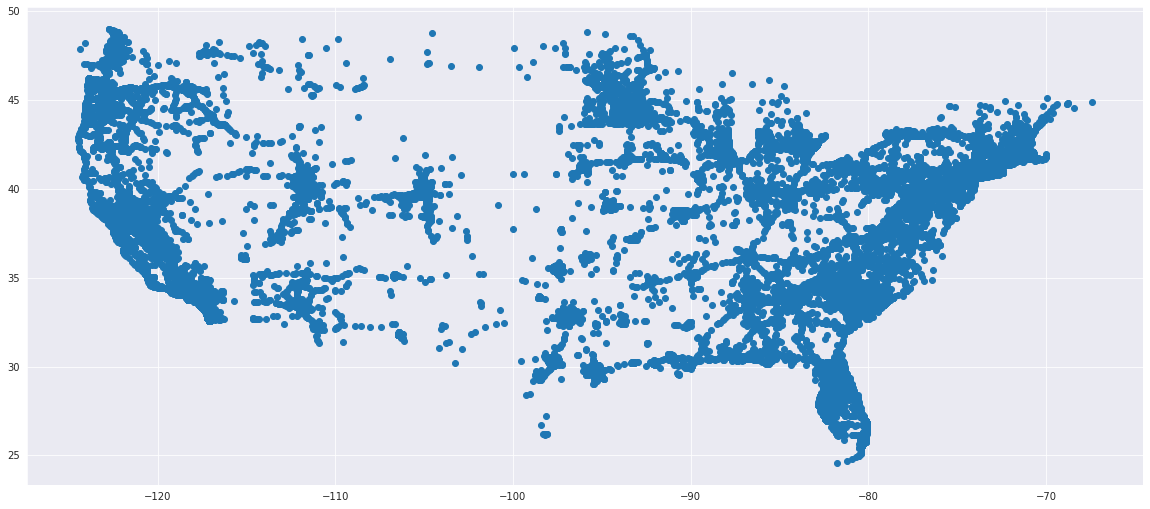

In [65]:
us_acc.sample(100000).plot(figsize=(20,10));

No handles with labels found to put in legend.


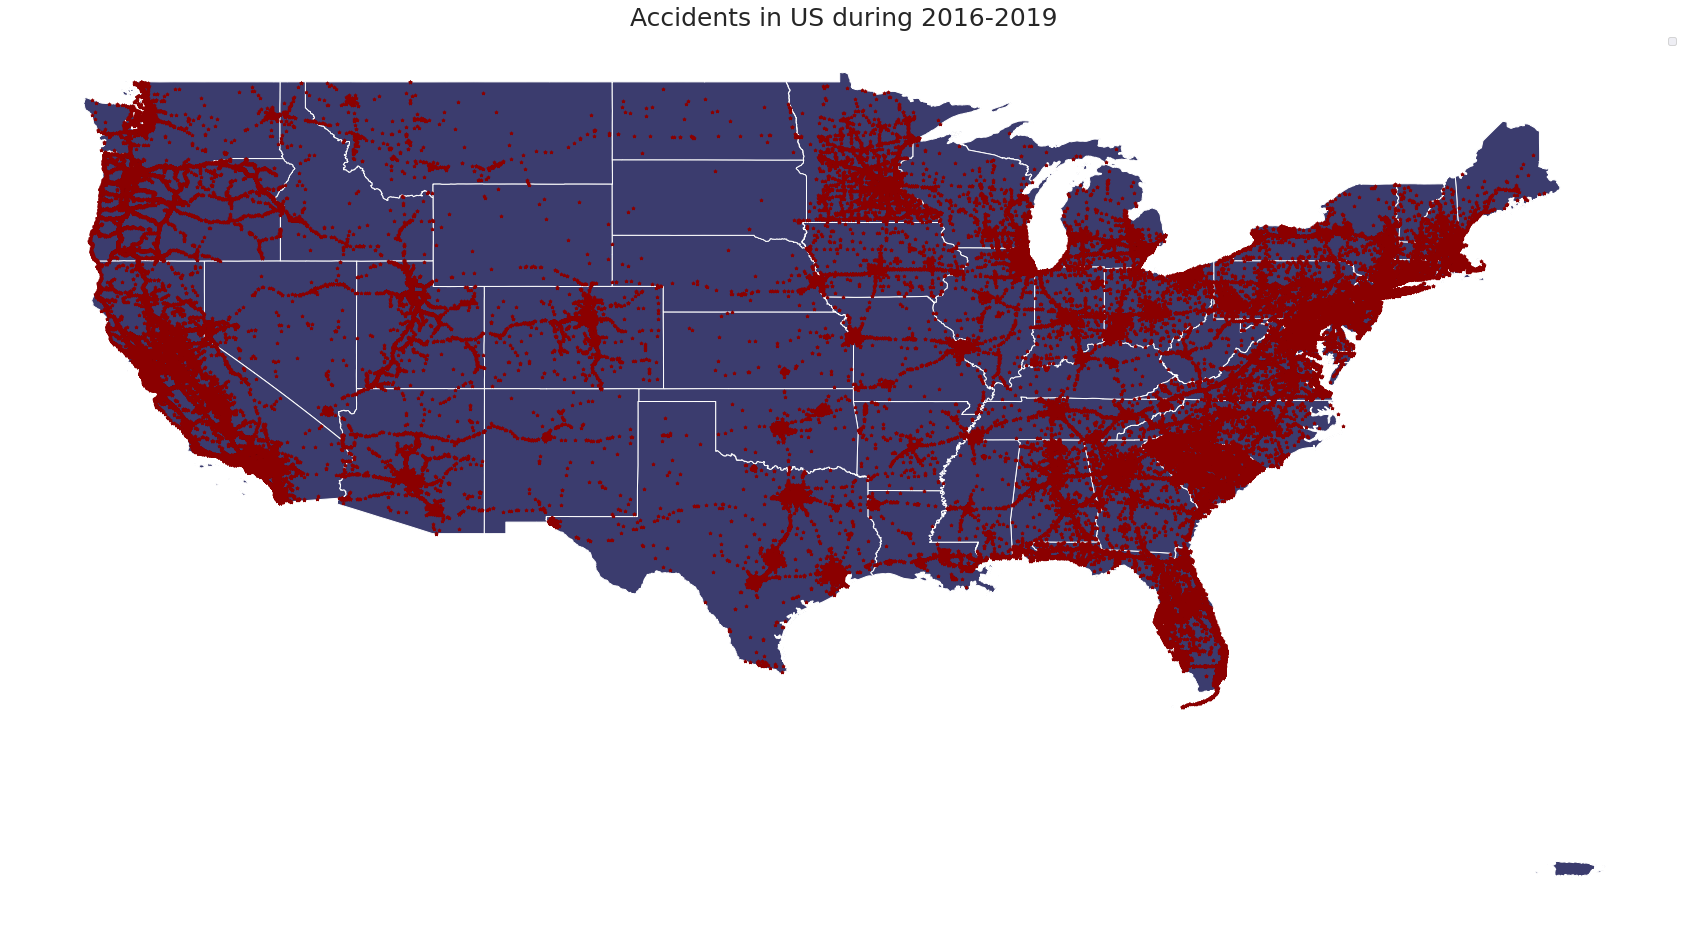

In [70]:
fig, ax = plt.subplots(1, figsize=(30,20))
base = us_shape[us_shape['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

us_acc.sample(500000).plot(ax=base, color='darkred', marker="*", markersize=10);
_ = ax.axis('off')
ax.set_title("Accidents in US during 2016-2019", fontsize=25)
plt.savefig('US_accidents.png',bbox_inches='tight');

### Questions to Answer

1. Are there more accidents in colder or warmer areas?
2. Which 5 states/cities have highest accidents?
3. What is the rank of New York in accidents?
4. What are the weather condition fro most of accidents?
5. At what time of day most accidents happen?
6. On which day of week most accidents happen?
7. What are other factors common in accidents?
8. Factors affecting accident severity?